<a href="https://colab.research.google.com/github/kamleshk3r/ML_PROJECT/blob/main/ML_20220701021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **Importing the Libraries**



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics  import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier

# **Importing Dataset**

In [ ]:
df = pd.read_csv('/content/apple_quality.csv')
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


# **EDA**

In [ ]:
print(df.shape)
print("-----------------------")
df.info()

(4001, 9)
-----------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [ ]:
df.isnull().sum()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [ ]:
df.tail()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good
4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Created_by_Nidula_Elgiriyewithana,NaN


In [ ]:
# Removing the null values
df=df.dropna()
print(df.info())
df.tail

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 312.5+ KB
None


<bound method NDFrame.tail of         A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0        0.0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1        1.0 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2        2.0 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3        3.0 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4        4.0  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   
...      ...       ...       ...        ...          ...        ...       ...   
3995  3995.0  0.059386 -1.067408  -3.714549     0.473052   1.697986  2.244055   
3996  3996.0 -0.293118  1.949253  -0.204020    -0.640196   0.024523 -1.087900   
3997  3997.0 -2.634515 -2.138247  -2.440461     0.657223   2.199709  4.763859   
3998  3998.0 -4.008004 -1.779337   2.366397    -0.200329   2.161435  0.214488   
3999  3999.0  0.278540 -1.715505   0.121217    -1.154075   1.266677 -0.776571   

           Acidity Quality  
0     -0.491590483    good  
1     -0.722809367    good  
2      2.621636473     bad  
3      0.790723217    good  
4      0.501984036    good  
...            ...     ...  
3995   0.137784369     bad  
3996   1.854235285    good  
3997  -1.334611391     bad  
3998  -2.229719806    good  
3999   1.599796456    good  

[4000 rows x 9 columns]>

In [ ]:
df = df.drop('A_id',axis=1)
df.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   object 
 7   Quality      4000 non-null   object 
dtypes: float64(6), object(2)
memory usage: 281.2+ KB


In [ ]:
df['Acidity'] = pd.to_numeric(df['Acidity'],errors = 'coerce')
print("\n")
print("check for null")
print(df.isnull().sum())

df.info()



check for null
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   float64
 7   Quality      4000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 281.2+ KB


In [ ]:
print("Check for duplicate rows")
print(df.duplicated().sum())

Check for duplicate rows
0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Size,4000.0,-0.503015,1.928059,-7.151703,-1.816765,-0.513703,0.805526,6.406367
Weight,4000.0,-0.989547,1.602507,-7.149848,-2.011770,-0.984736,0.030976,5.790714
Sweetness,4000.0,-0.470479,1.943441,-6.894485,-1.738425,-0.504758,0.801922,6.374916
Crunchiness,4000.0,0.985478,1.402757,-6.055058,0.062764,0.998249,1.894234,7.619852
Juiciness,4000.0,0.512118,1.930286,-5.961897,-0.801286,0.534219,1.835976,7.364403
Ripeness,4000.0,0.498277,1.874427,-5.864599,-0.771677,0.503445,1.766212,7.237837
Acidity,4000.0,0.076877,2.110270,-7.010538,-1.377424,0.022609,1.510493,7.404736


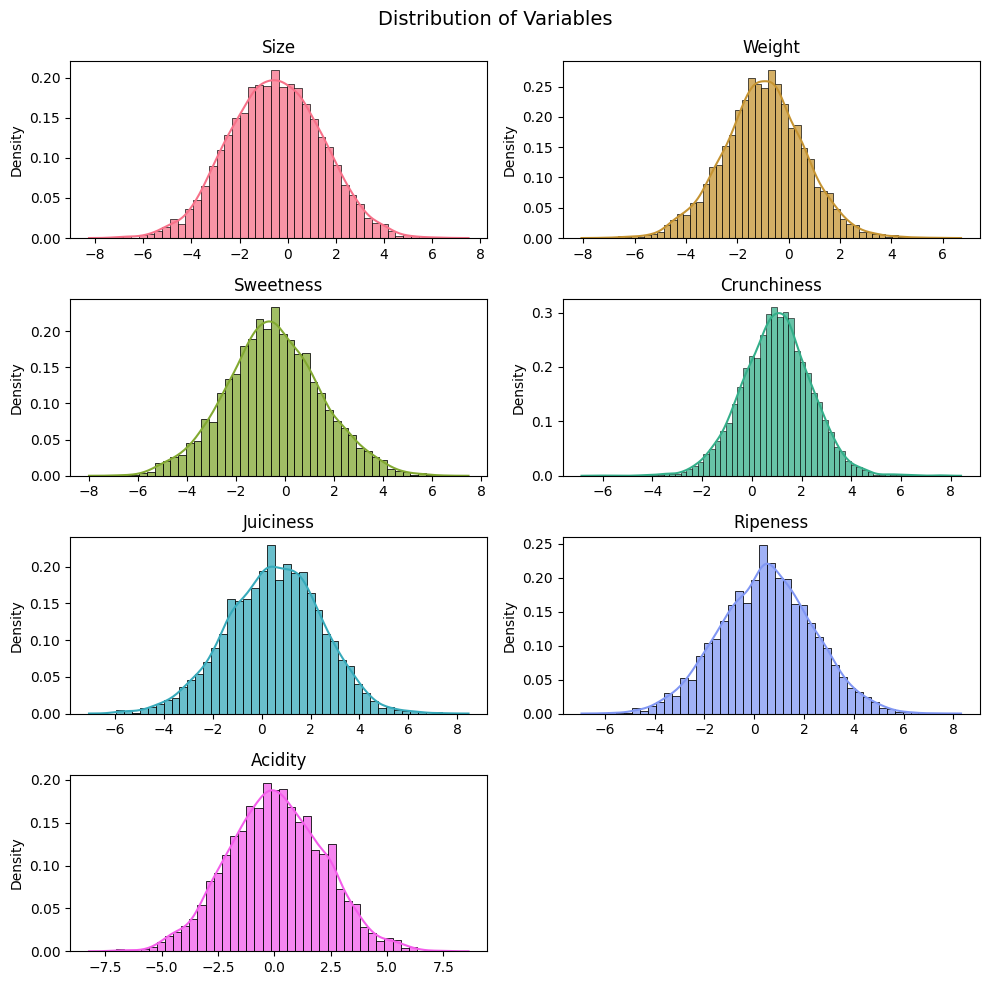

In [ ]:
cols = df.columns[:-1]
colors = sns.color_palette('husl',len(cols))

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(10,10))
axs = axs.flatten()

for i, col in enumerate(cols):
  sns.kdeplot(df[col], ax=axs[i], color=colors[i])
  sns.histplot(df[col], ax=axs[i], color=colors[i], stat='density')

  axs[i].set_xlabel('')
  axs[i].set_title(col)
  plt.tight_layout()

fig.suptitle("Distribution of Variables", fontsize=14)
fig.delaxes(ax=axs[len(cols)])
fig.tight_layout()


good    2004
bad     1996
Name: Quality, dtype: int64


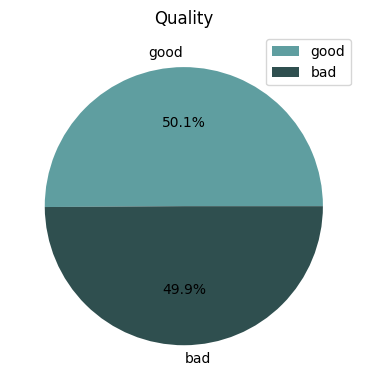

In [ ]:
print(df['Quality'].value_counts())

plt.figure(figsize = (4,4))
plt.pie(df['Quality'].value_counts(), labels=['good','bad'],autopct='%1.1f%%',colors = ['cadetblue','darkslategray'])
plt.legend()
plt.title('Quality')
plt.tight_layout()
plt.show()

# **Correlation**

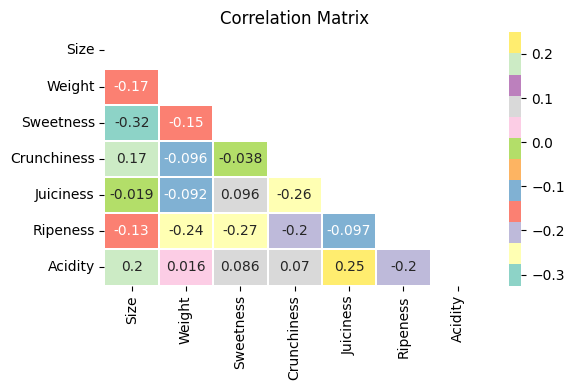

In [ ]:
cols = df.columns[:-1]
correlation_matrix = df[cols].corr()
mask  = np.triu(np.ones_like(correlation_matrix,dtype=bool))
plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, mask=mask , annot =True , cmap='Set3',linewidths = 0.2,
linecolor="white")

plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

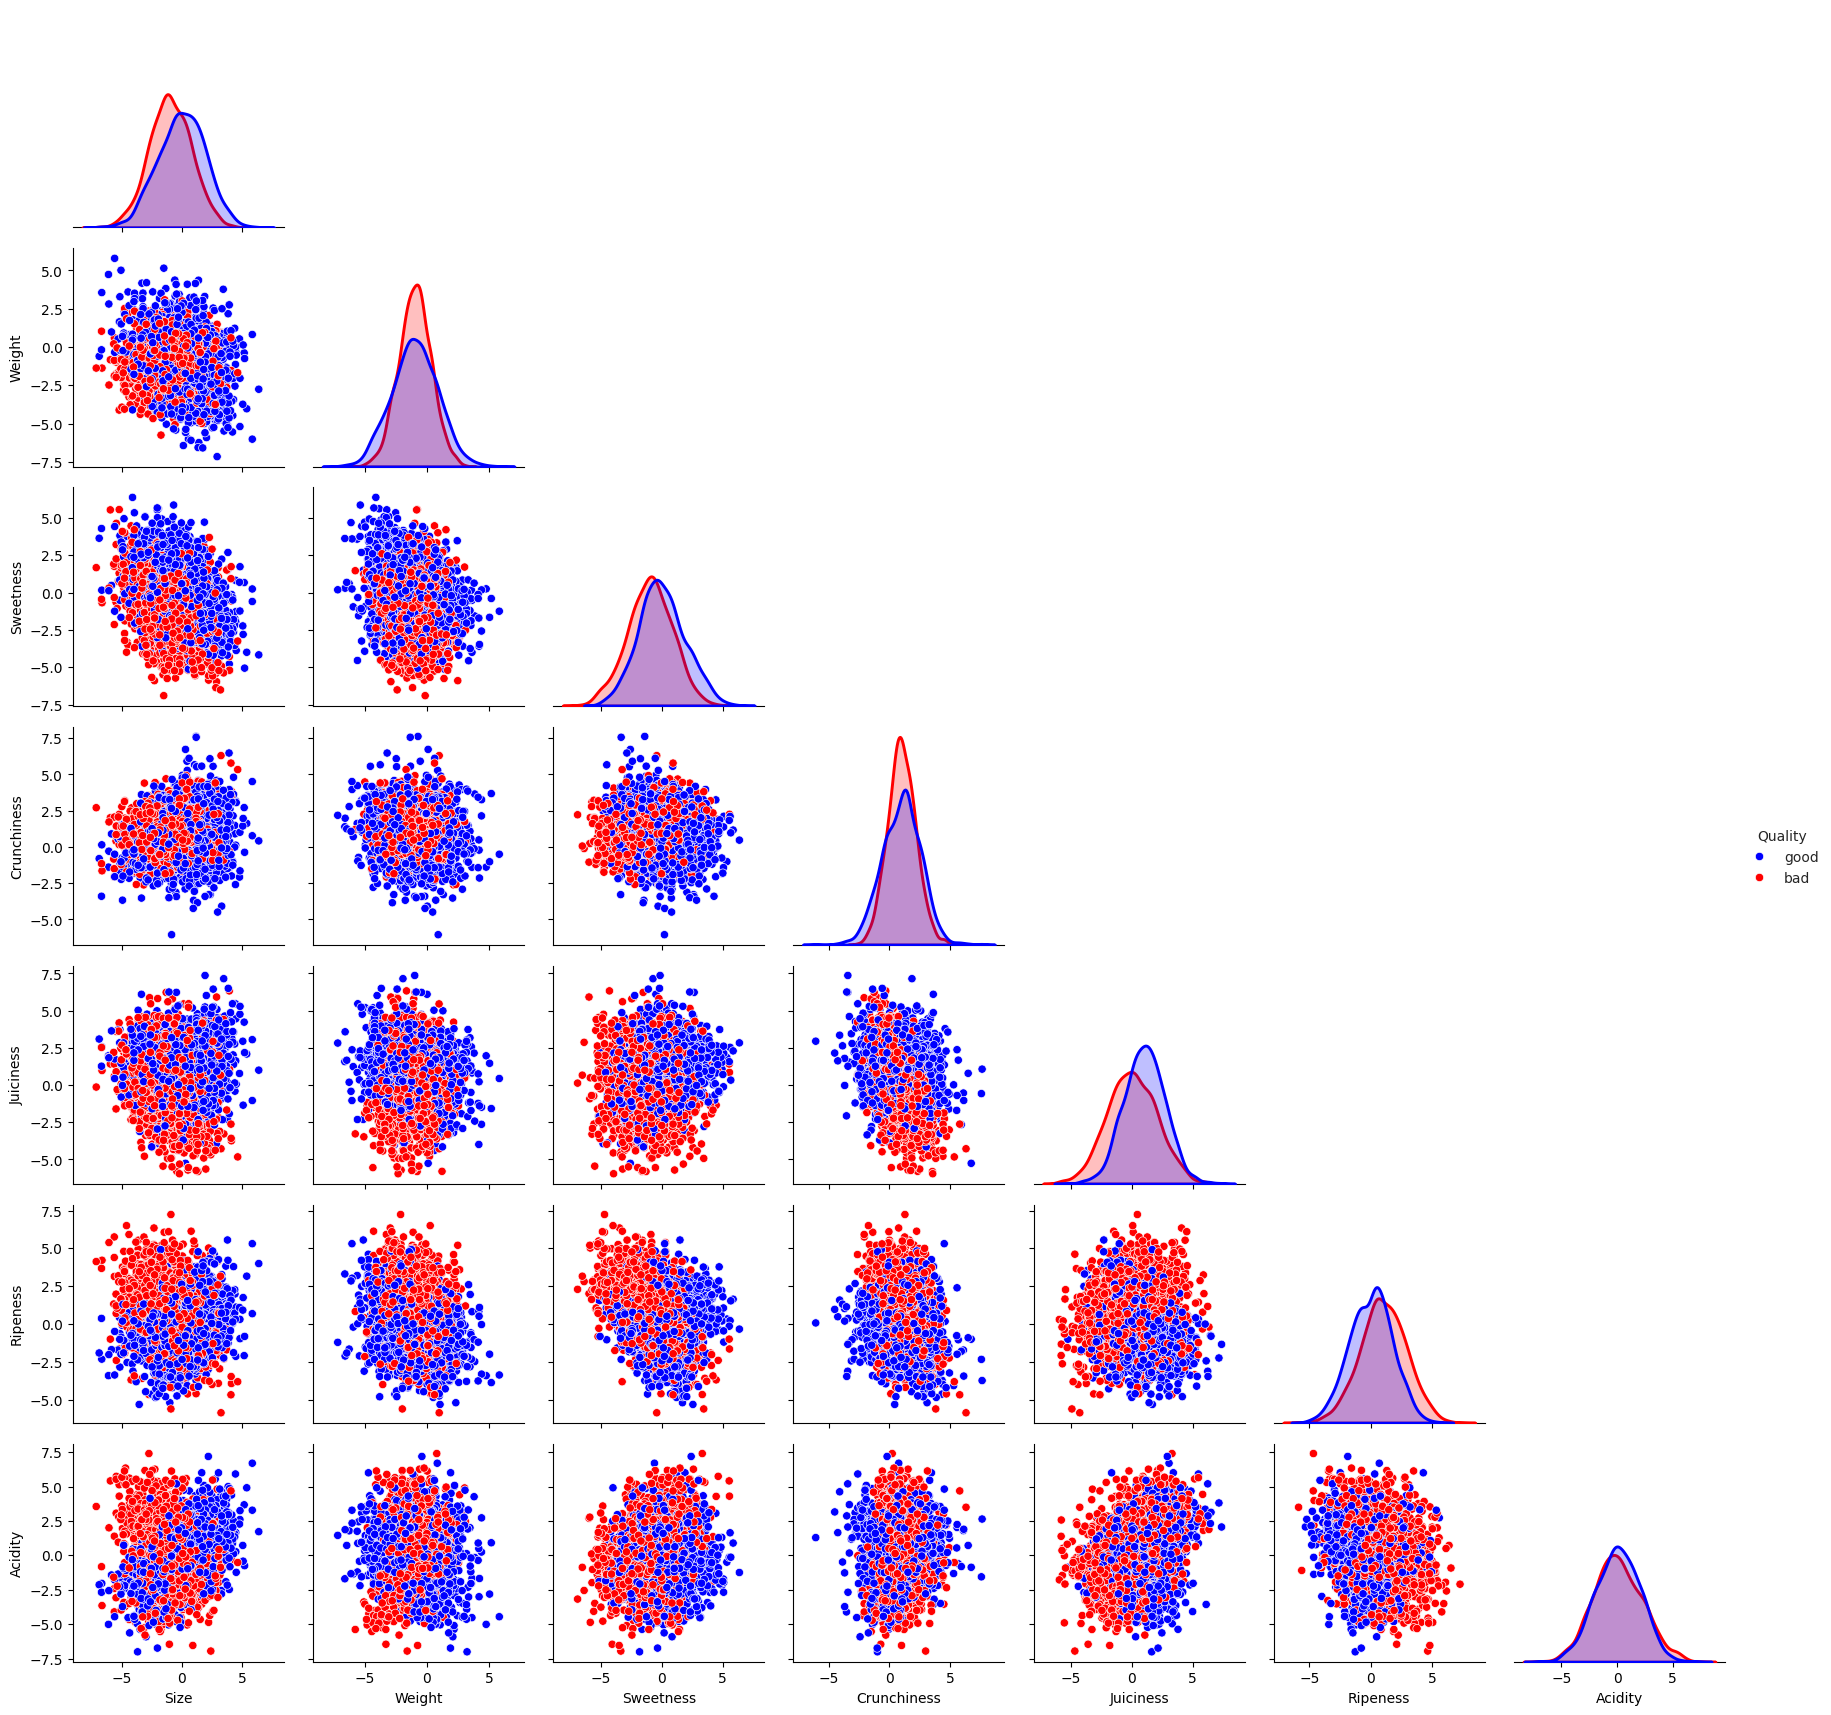

In [ ]:
custom_platte = {'good': '#0000ff','bad': '#ff0000'}
pair_grid = sns.PairGrid(df, hue='Quality',palette=custom_platte, corner = True)

pair_grid.map_lower(sns.scatterplot)
pair_grid.map_diag(sns.kdeplot, fill=True, linewidth=2.1)

sns.set_style('darkgrid')
pair_grid.add_legend()
plt.show()

# **Preprocessing**

In [ ]:
print(df['Quality'].value_counts())
df.head()

good    2004
bad     1996
Name: Quality, dtype: int64


,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good


# **Converting Columns**

Good = 1
Bad = 0

In [ ]:
df['Quality'] = (df['Quality'] == 'good').astype(int)

In [ ]:
df['Quality'].value_counts()
df.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1


# **Splitting the Dataset**

In [ ]:
X = df.iloc[:, :-1]
y = df['Quality']

print(X.shape)
print(y.shape)

(4000, 7)
(4000,)


# Splitting the data into train, validation and test

In [ ]:
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2, random_state = 42)

X_train, X_val, y_train, y_val = tts(X_train, y_train, test_size = 0.2, random_state = 42)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

print("Y train value counts:")
print(y_train.value_counts())
print('----------------')
print('Y validation value counts:')
print(y_val.value_counts())
print('----------------')
print('Y test value counts:')
print(y_test.value_counts())
print('----------------')

(2560, 7)
(640, 7)
(800, 7)
Y train value counts:
0    1280
1    1280
Name: Quality, dtype: int64
----------------
Y validation value counts:
1    325
0    315
Name: Quality, dtype: int64
----------------
Y test value counts:
0    401
1    399
Name: Quality, dtype: int64
----------------


# **MODELING**

## **KNN**

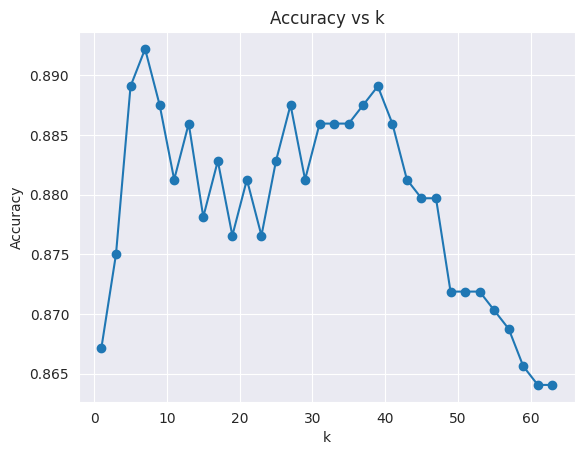

Best k:7


In [ ]:
test_k = [i for i in range(1,64,2)]
train_acc = []

for k in test_k:
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_val)
  train_acc.append(accuracy_score(y_val, y_pred))

plt.plot(test_k, train_acc, marker='o')
plt.xlabel('k')

plt.ylabel('Accuracy')
plt.title('Accuracy vs k')
plt.show()

best_validation_k = test_k[train_acc.index(max(train_acc))]
print(f'Best k:{best_validation_k}')

---------------- K = 1 -----------------
Accuracy: 0.88875
----------------------------------------
Confusion Matrix:  
[[352  49]
 [ 40 359]]
----------------------------------------
Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       401
           1       0.88      0.90      0.89       399

    accuracy                           0.89       800
   macro avg       0.89      0.89      0.89       800
weighted avg       0.89      0.89      0.89       800

----------------------------------------
---------------- K = 3 -----------------
Accuracy: 0.88875
----------------------------------------
Confusion Matrix:  
[[355  46]
 [ 43 356]]
----------------------------------------
Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       401
           1       0.89      0.89      0.89       399

    accuracy                           0.89       80

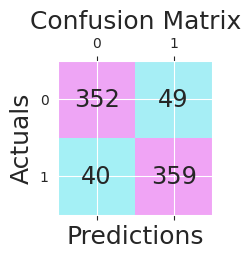

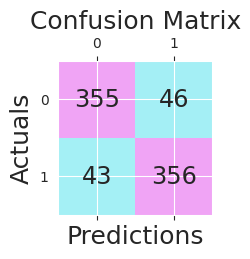

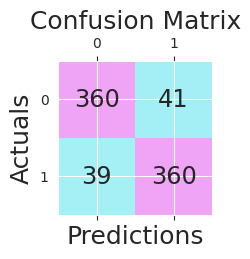

In [ ]:
knn_1 = KNeighborsClassifier(n_neighbors = 1)
knn_3 = KNeighborsClassifier(n_neighbors = 3)
knn_validation_best = KNeighborsClassifier(n_neighbors = best_validation_k)
knn_models = [knn_1, knn_3, knn_validation_best]

for model in knn_models:
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  print('---------------- K = {} -----------------'.format(model.n_neighbors))
  print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
  print('----------------------------------------')
  print(f'Confusion Matrix:  \n{confusion_matrix(y_test, y_pred)}')
  print('----------------------------------------')
  print(f'Classification Report: \n{classification_report(y_test, y_pred)}')
  print('----------------------------------------')

  cf_matrix =confusion_matrix(y_test,y_pred)

  fig, ax = plt.subplots(figsize=(2,2))
  ax.matshow(cf_matrix,cmap=plt.cm.cool, alpha= 0.3)
  for i in range(cf_matrix.shape[0]):
    for j in range(cf_matrix.shape[1]):
      ax.text(x=j,y=i , s=cf_matrix[i,j] , va ='center', ha='center', size='xx-large')

  plt.xlabel('Predictions',fontsize=18)
  plt.ylabel('Actuals',fontsize=18)
  plt.title('Confusion Matrix',fontsize=18)

# **Some More Classifiers**

In [ ]:
classifiers = [
    LogisticRegression(random_state = 42 , n_jobs=-1),
    SVC(random_state = 42 ,probability = True),
    RandomForestClassifier(random_state = 42),

]

In [ ]:
sorted_classifiers = []
for classifier in classifiers:
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_val)
  print('--------------{}-------------'.format(classifier.__class__.__name__))
  print(f'Accuracy:{accuracy_score(y_val, y_pred)}')
  sorted_classifiers.append((classifier.__class__.__name__, accuracy_score(y_val, y_pred)))

--------------LogisticRegression-------------
Accuracy:0.73125
--------------SVC-------------
Accuracy:0.8828125
--------------RandomForestClassifier-------------
Accuracy:0.8703125


<ipython-input-29-05d72bcadc19>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('Pastel2')


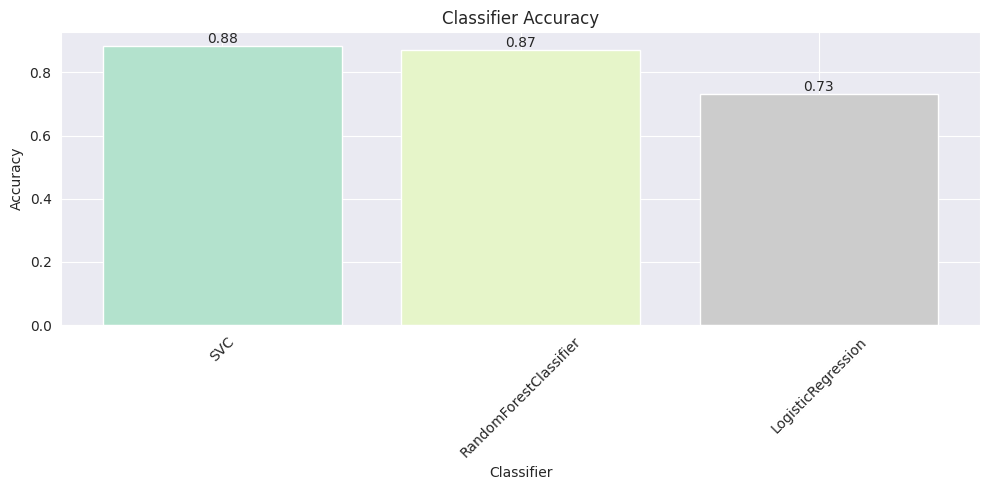

In [ ]:
import matplotlib.cm as cm
sorted_classifiers.sort(key = lambda x:x[1], reverse = True)

color_map = cm.get_cmap('Pastel2')

colors = color_map(np.linspace(0,1, len(sorted_classifiers)))

plt.figure(figsize=(10,5))
bars = plt.bar([classifier[0] for classifier in sorted_classifiers],
               [classifier[1] for classifier in sorted_classifiers],
               color=colors)

plt.xticks(rotation = 45)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracy')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# **SVC Hyperparameter tuning**

In [ ]:
param_grid = {
    'C': [0.1, 1 ,10 ,100]
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END .............................C=0.1;, score=0.854 total time=   0.2s
[CV 2/5] END .............................C=0.1;, score=0.814 total time=   0.2s
[CV 3/5] END .............................C=0.1;, score=0.836 total time=   0.1s
[CV 4/5] END .............................C=0.1;, score=0.846 total time=   0.2s
[CV 5/5] END .............................C=0.1;, score=0.848 total time=   0.1s
[CV 1/5] END ...............................C=1;, score=0.881 total time=   0.1s
[CV 2/5] END ...............................C=1;, score=0.863 total time=   0.1s
[CV 3/5] END ...............................C=1;, score=0.879 total time=   0.1s
[CV 4/5] END ...............................C=1;, score=0.883 total time=   0.1s
[CV 5/5] END ...............................C=1;, score=0.895 total time=   0.1s
[CV 1/5] END ..............................C=10;, score=0.889 total time=   0.1s
[CV 2/5] END ..............................C=10;,

Best_C = 100
Accuracy: 0.91625
--------------------------------------
Confusion Matrix: 
[[371  30]
 [ 37 362]]
--------------------------------------
Classification Report: 
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       401
           1       0.92      0.91      0.92       399

    accuracy                           0.92       800
   macro avg       0.92      0.92      0.92       800
weighted avg       0.92      0.92      0.92       800

--------------------------------------


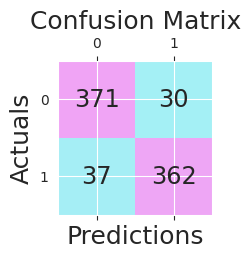

In [ ]:
BEST_C = grid.best_params_['C']
print("Best_C =",BEST_C)
svc_model = SVC(probability = True, random_state =  41, C=BEST_C)
svc_model.fit(X_train, y_train)
y_pred = svc_model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('--------------------------------------')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print('--------------------------------------')
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')
print('--------------------------------------')

cf_matrix =confusion_matrix(y_test,y_pred)

fig, ax = plt.subplots(figsize=(2,2))
ax.matshow(cf_matrix,cmap=plt.cm.cool, alpha= 0.3)
for i in range(cf_matrix.shape[0]):
  for j in range(cf_matrix.shape[1]):
    ax.text(x=j,y=i , s=cf_matrix[i,j] , va ='center', ha='center', size='xx-large')

  plt.xlabel('Predictions',fontsize=18)
  plt.ylabel('Actuals',fontsize=18)
  plt.title('Confusion Matrix',fontsize=18)

# **RFC**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

n_estimators_range = [50, 100, 200, 500, 1000, 1500]
param_grid = dict(n_estimators=n_estimators_range)

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print(grid.cv_results_)

print(grid.best_score_)
print(grid.best_params_)

{'mean_fit_time': array([0.34715881, 0.51136308, 1.00862207, 2.72645617, 5.49686475,
       8.13323054]), 'std_fit_time': array([0.04784007, 0.01138593, 0.00657626, 0.19866409, 0.35959313,
       0.54434611]), 'mean_score_time': array([0.0114109 , 0.01607733, 0.02949171, 0.07532272, 0.14019861,
       0.20187297]), 'std_score_time': array([0.00189383, 0.00070723, 0.00061033, 0.00815836, 0.00261238,
       0.0024407 ]), 'param_n_estimators': masked_array(data=[50, 100, 200, 500, 1000, 1500],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'n_estimators': 50}, {'n_estimators': 100}, {'n_estimators': 200}, {'n_estimators': 500}, {'n_estimators': 1000}, {'n_estimators': 1500}], 'split0_test_score': array([0.88085938, 0.88671875, 0.87890625, 0.8828125 , 0.87695312,
       0.87695312]), 'split1_test_score': array([0.87695312, 0.86914062, 0.87304688, 0.875     , 0.87304688,
       0.87304688]), 'split2_test_score': ar

500
Accuracy: 0.89875
--------------------------------------
Confusion Matrix: 
[[356  45]
 [ 36 363]]
--------------------------------------
Classification Report: 
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       401
           1       0.89      0.91      0.90       399

    accuracy                           0.90       800
   macro avg       0.90      0.90      0.90       800
weighted avg       0.90      0.90      0.90       800

--------------------------------------


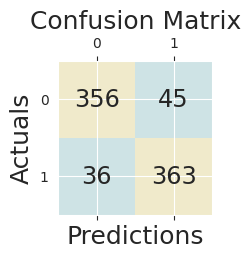

In [ ]:
BEST_N_ESTIMATORS = grid.best_params_['n_estimators']
print(BEST_N_ESTIMATORS)
rfc_model = RandomForestClassifier(n_estimators=BEST_N_ESTIMATORS, random_state=42)
rfc_model.fit(X_train, y_train)
y_pred = rfc_model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('--------------------------------------')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print('--------------------------------------')
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')
print('--------------------------------------')
cf_matrix =confusion_matrix(y_test,y_pred)

fig, ax = plt.subplots(figsize=(2,2))
ax.matshow(cf_matrix,cmap=plt.cm.Set3, alpha= 0.3)
for i in range(cf_matrix.shape[0]):
  for j in range(cf_matrix.shape[1]):
    ax.text(x=j,y=i , s=cf_matrix[i,j] , va ='center', ha='center', size='xx-large')

  plt.xlabel('Predictions',fontsize=18)
  plt.ylabel('Actuals',fontsize=18)
  plt.title('Confusion Matrix',fontsize=18)

# **ROC CURVE FUNCTION**

In [ ]:
def report_classifiers_curves(classifier):
    y_scores = classifier.predict_proba(X_test)[:, 1]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    ax1.plot(recall, precision, label='Precision-Recall curve')
    ax1.set_xlabel('Recall')
    ax1.set_ylabel('Precision')
    ax1.set_title(f'Precision-Recall curve of {classifier.__class__.__name__}')
    ax1.legend(loc="lower left")

    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    ax2.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
    ax2.plot([0, 1], [0, 1], 'k--')
    ax2.set_xlim([0.0, 1.0])
    ax2.set_ylim([0.0, 1.05])
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title(f'Receiver Operating Characteristic of {classifier.__class__.__name__}')
    ax2.legend(loc="lower right")


    plt.tight_layout()
    plt.show()

# **ROC CURVE**

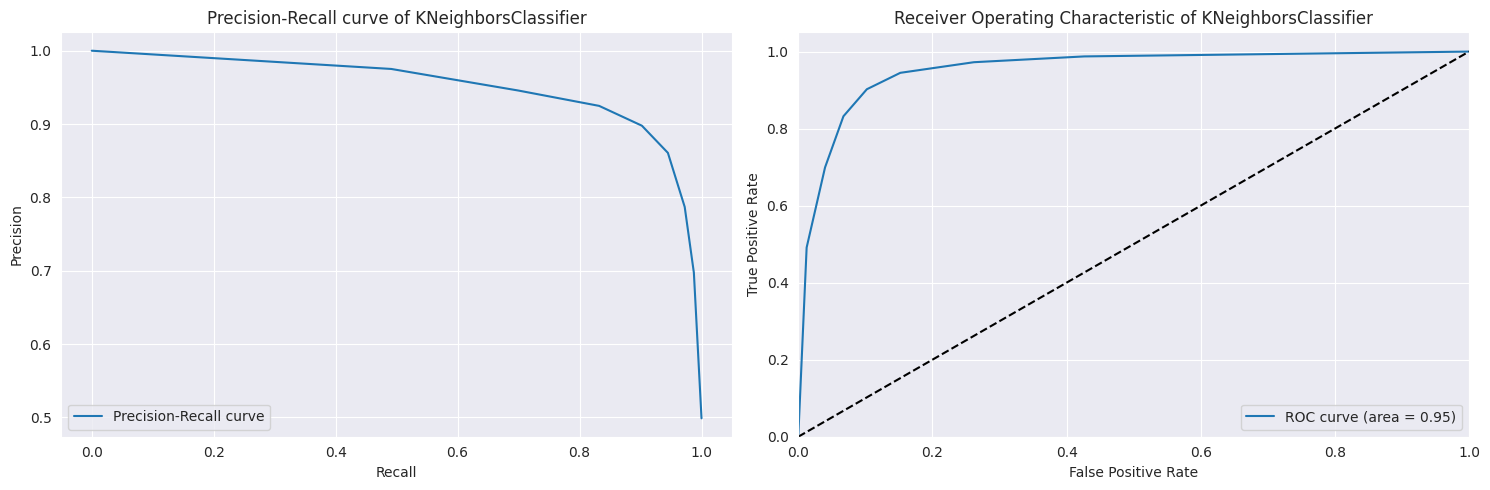

In [ ]:
report_classifiers_curves(knn_validation_best)

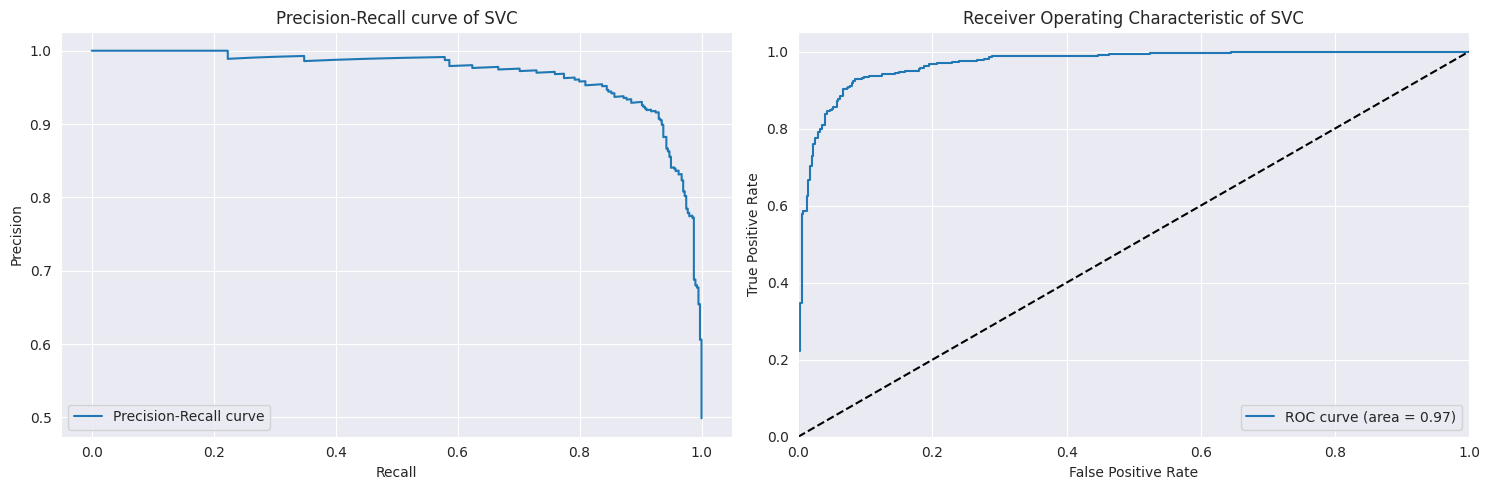

In [ ]:
report_classifiers_curves(svc_model)

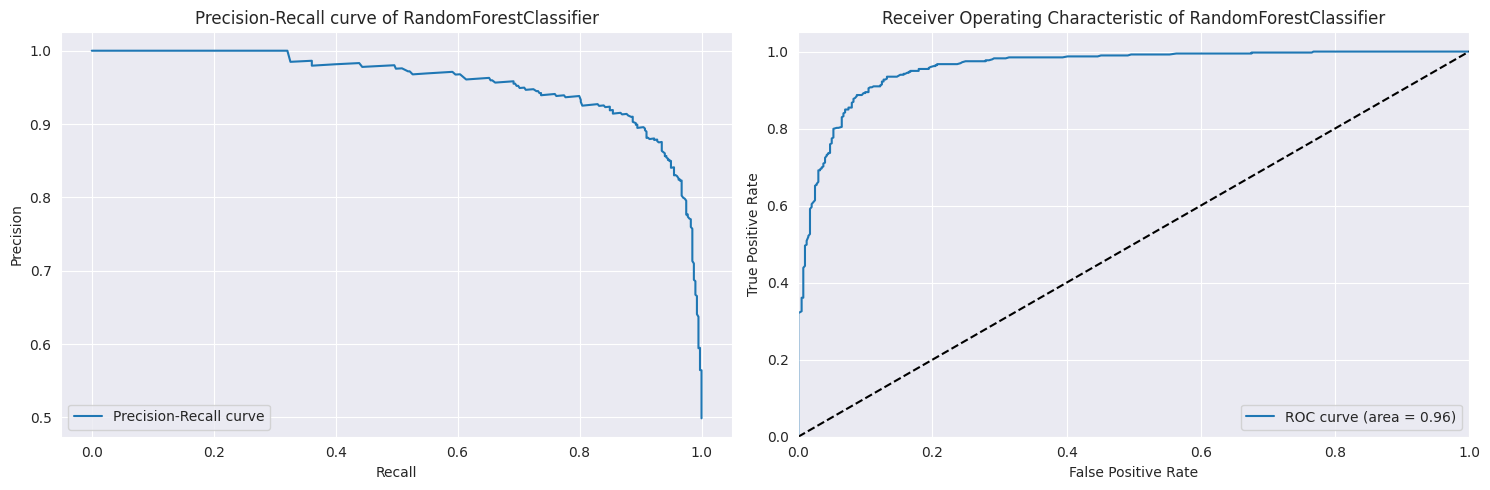

In [ ]:
report_classifiers_curves(rfc_model)

In [ ]:
y_pred = svc_model.predict(X_test)

df_test = pd.DataFrame(X_test)


df_test['actual'] = y_test
df_test['predicted'] = y_pred

df_errors = df_test[df_test['actual'] != df_test['predicted']]
print(df_errors.describe().T)

             count      mean       std       min       25%       50%  \
Size          67.0 -0.255729  1.880964 -4.921336 -1.520249 -0.047807   
Weight        67.0 -0.857968  1.736765 -6.086894 -1.582233 -0.692104   
Sweetness     67.0 -0.386791  1.953837 -4.106682 -1.829695 -0.700877   
Crunchiness   67.0  1.208318  1.202672 -2.011756  0.441853  1.359634   
Juiciness     67.0 -0.038860  1.724483 -3.947638 -1.170369  0.046173   
Ripeness      67.0  0.612795  1.860831 -4.281312 -0.497137  0.406578   
Acidity       67.0  0.220960  1.630755 -3.873113 -0.940545  0.004236   
actual        67.0  0.552239  0.501017  0.000000  0.000000  1.000000   
predicted     67.0  0.447761  0.501017  0.000000  0.000000  0.000000   

                  75%       max  
Size         1.034856  3.834730  
Weight       0.204737  3.010306  
Sweetness    1.272901  4.686212  
Crunchiness  1.944506  4.153900  
Juiciness    0.919944  5.464513  
Ripeness     1.526716  5.553256  
Acidity      1.390024  4.902217  
actual 

# **Performance Analysis**

In [ ]:
def box_plot(data):

    plt.figure(figsize=(15, 10))
    sns.boxplot(data=data)
    plt.title('Boxplots of Features in df_errors')
    sns.stripplot(data=data, color='black')
    plt.xticks(rotation=45)
    plt.tight_layout()


    plt.show()

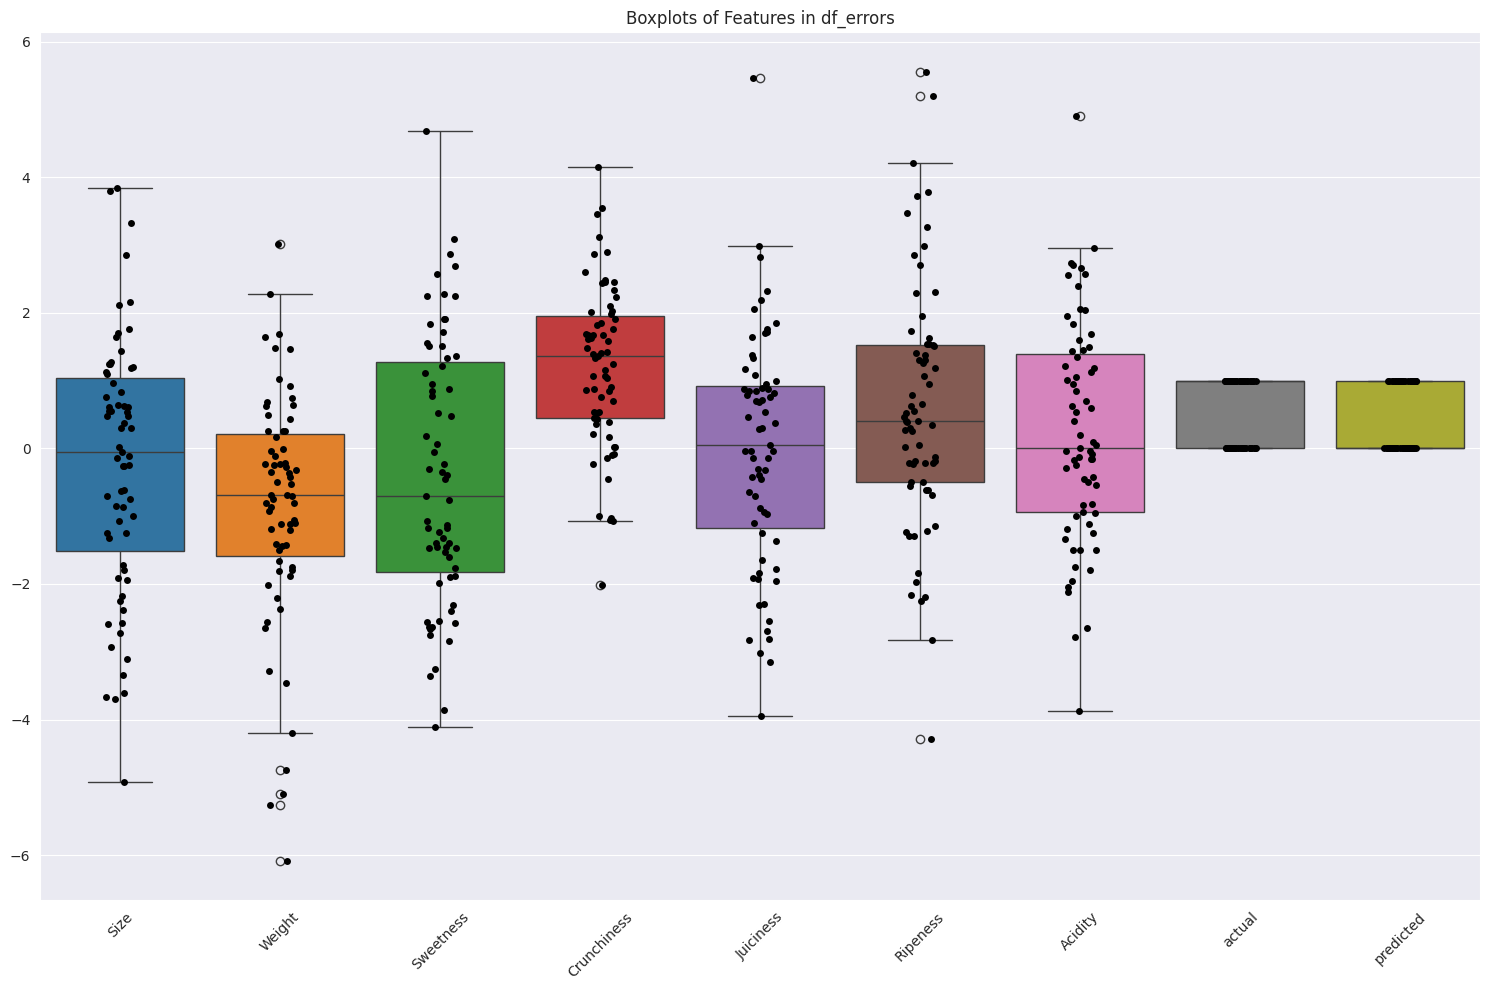

In [ ]:
box_plot(df_errors)

In [ ]:
print(df.describe().T)

              count      mean       std       min       25%       50%  \
Size         4000.0 -0.503015  1.928059 -7.151703 -1.816765 -0.513703   
Weight       4000.0 -0.989547  1.602507 -7.149848 -2.011770 -0.984736   
Sweetness    4000.0 -0.470479  1.943441 -6.894485 -1.738425 -0.504758   
Crunchiness  4000.0  0.985478  1.402757 -6.055058  0.062764  0.998249   
Juiciness    4000.0  0.512118  1.930286 -5.961897 -0.801286  0.534219   
Ripeness     4000.0  0.498277  1.874427 -5.864599 -0.771677  0.503445   
Acidity      4000.0  0.076877  2.110270 -7.010538 -1.377424  0.022609   
Quality      4000.0  0.501000  0.500062  0.000000  0.000000  1.000000   

                  75%       max  
Size         0.805526  6.406367  
Weight       0.030976  5.790714  
Sweetness    0.801922  6.374916  
Crunchiness  1.894234  7.619852  
Juiciness    1.835976  7.364403  
Ripeness     1.766212  7.237837  
Acidity      1.510493  7.404736  
Quality      1.000000  1.000000  


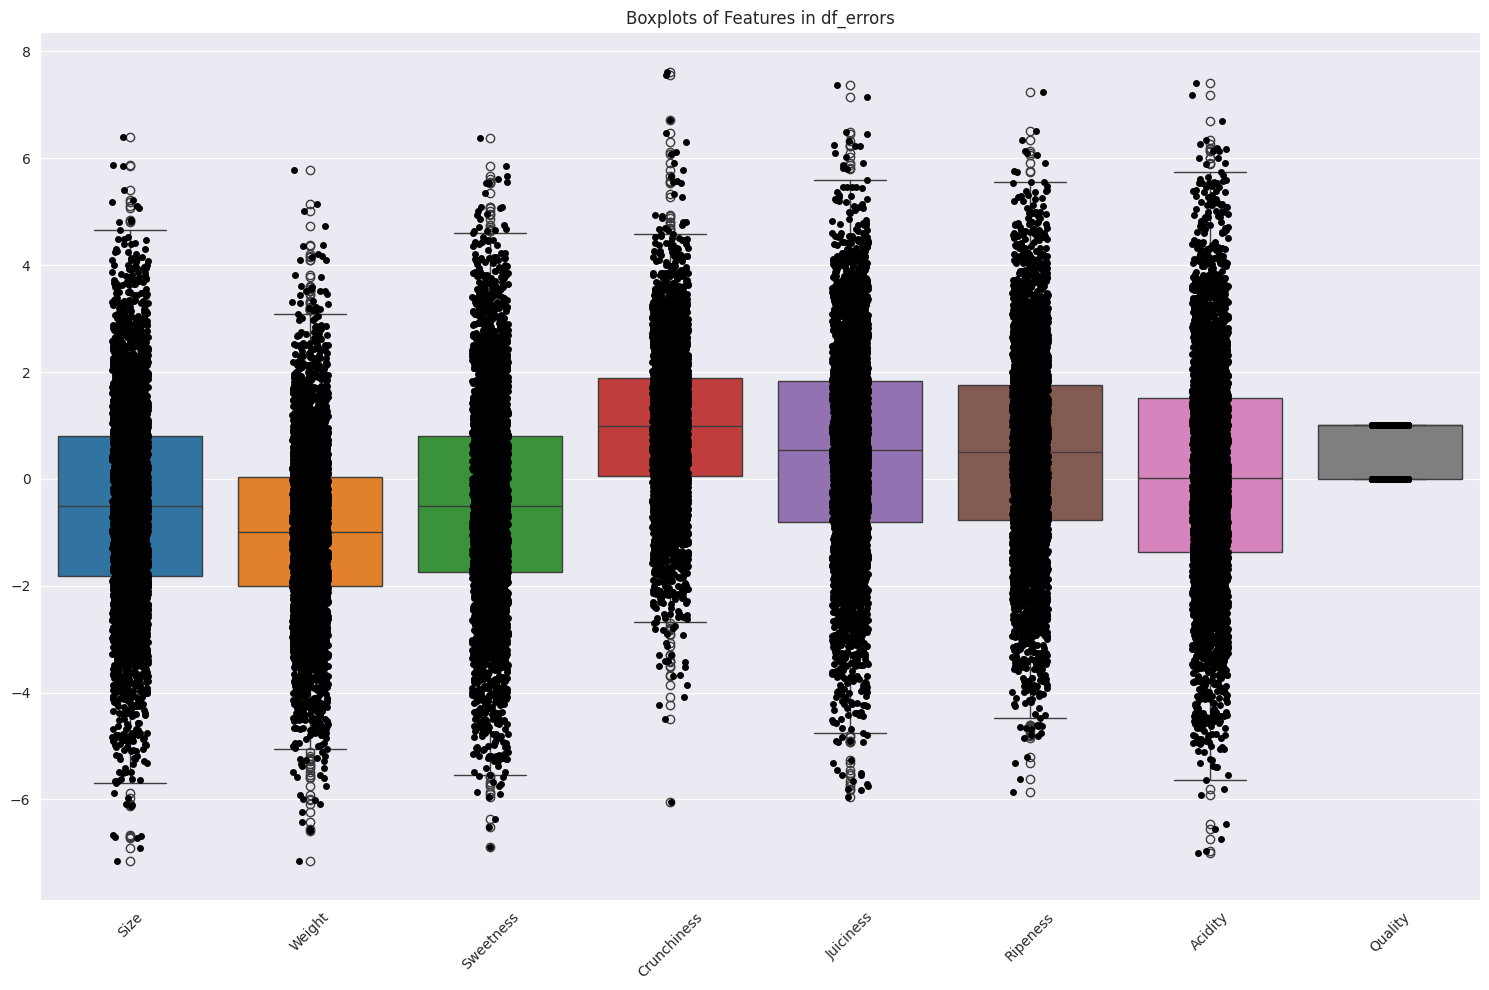

In [ ]:
box_plot(df)